In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/-spotify-tracks-dataset/dataset.csv


In [2]:
pd.__version__

'2.2.2'

# Description about the Data 🎶

**About Dataset**

**Content**
This is a dataset of Spotify tracks over a range of 125 different genres. Each track has some audio features associated with it. The data is in CSV format which is tabular and can be loaded quickly.

**Usage**
The dataset can be used for:

1. Building a Recommendation System based on some user input or preference
2. Classification purposes based on audio features and available genres
3. Any other application that you can think of. Feel free to discuss!

**Column Description**

1. **track_id**: The Spotify ID for the track
2. **artists**: The artists' names who performed the track. If there is more than one artist, they are separated by a ;
3. **album_name**: The album name in which the track appears
4. **track_name**: Name of the track
5. **popularity**: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
6. **duration_ms**: The track length in milliseconds
7. **explicit**: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
8. **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
9. **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
10. **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
11. **loudness**: The overall loudness of a track in decibels (dB)
12. **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
13. **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
14. **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
15. **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
16. **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
17. **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
18. **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
19. **time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
20. **track_genre**: The genre in which the track belongs.

# Import the packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the Data

In [4]:
# load the dataframe
DATA_PATH = "/kaggle/input/-spotify-tracks-dataset/dataset.csv"
df = pd.read_csv(DATA_PATH)

df.sample(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
70952,70952,1Tx2Ukjlby5Cy1AcC7RKe9,Shi Shi,是他不配/微笑帶過,是他不配,27,238381,False,0.266,0.791,...,-5.539,0,0.0461,0.02250,0.000000,0.0694,0.270,84.965,3,mandopop
67636,67636,02CXWW03gPcga4hBsuylGM,Selena;Barrio Boyzz,Halloween 2022 Pop Vol. 1,Donde Quiera Que Estés,0,270213,False,0.629,0.936,...,-5.140,0,0.0549,0.08270,0.000047,0.1480,0.932,89.605,4,latin
87933,87933,5Y0fOjIwvBC7ZZC6l6dOPz,Novos Baianos,Infinito Circular (Ao Vivo),Dê Um Rolê - Ao Vivo,41,196533,False,0.522,0.550,...,-9.911,1,0.0662,0.18800,0.000000,0.7540,0.391,138.276,4,r-n-b
104107,104107,2GXCmc3A6ahTNnBsrkrRuh,India Martinez;Melendi,SI ELLA SUPIERA,SI ELLA SUPIERA,69,233633,False,0.728,0.608,...,-6.384,1,0.0713,0.32600,0.000000,0.1390,0.658,138.923,4,spanish
28682,28682,10T50w3XYQ09AVYrHKJY0s,Mungo's Hi Fi;Warrior Queen,Serious Time,Can't Stand It,26,215684,False,0.815,0.622,...,-8.807,1,0.4080,0.10100,0.000151,0.1010,0.657,170.029,4,dub
87768,87768,5fKF2n5jmZDMTVbg9bW6R0,Charlie Brown Jr.,Transpiração Contínua Prolongada - Edição Come...,Sheik,41,171333,False,0.852,0.859,...,-3.214,0,0.0657,0.15300,0.000921,0.1360,0.914,108.344,4,r-n-b
110423,110423,57Y9YzDxXB2sVlhvqK94sK,York;Kryder,On The Beach (Kryder Remix),On The Beach - Kryder Remix,54,173841,False,0.565,0.899,...,-6.016,1,0.0324,0.00576,0.795000,0.1620,0.111,123.988,4,trance
438,438,73Nw51XTNstlk3Wu1K26cB,Stephen Speaks,No More Doubt,Passenger Seat (Acoustic),63,273066,False,0.549,0.437,...,-8.640,1,0.0313,0.68200,0.000016,0.2240,0.688,153.604,4,acoustic
104656,104656,5ZCamgcqvkckdf2FdfYuth,Leiva,La Llamada,La Llamada,56,240205,False,0.623,0.488,...,-8.246,1,0.0290,0.50000,0.000211,0.1310,0.169,114.019,4,spanish
93795,93795,3oETjW03c8oLrx4HwXrPVo,Sergei Lemeshev,"Russkie narodnye pesni, Chast' 2",Pesnja bobylja,0,126911,False,0.618,0.644,...,-9.756,0,0.3500,0.89800,0.000000,0.6330,0.804,107.485,4,romance


In [5]:
# remove the un-named index column

temp_df = df.drop(columns=df.columns[0])

temp_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [6]:
# shape of the data

print('The data has {} rows and {} columns'.format(temp_df.shape[0],temp_df.shape[1]))

The data has 114000 rows and 20 columns


In [7]:
# check for the missing values in data

temp_df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

**Check if the missing value is from a single row or multiple rows**

In [8]:
# row that has missing values
(
    temp_df
    .loc[
        temp_df
        .isna()
        .any(axis=1),
    ]
)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


**Observation**

Dropping the row from the data makes sense here because:
1. Only one row has missing data.
2. This song cannot be recommended as album name, track name and artist name is missing. 

In [9]:
# drop the row of data

print('The number of rows in the data before removing missing values are {}'.format(temp_df.shape[0]))

temp_df.dropna(inplace=True)

print('The number of rows in the data after removing missing values are {}'.format(temp_df.shape[0]))

The number of rows in the data before removing missing values are 114000
The number of rows in the data after removing missing values are 113999


In [10]:
# datatypes of columns in data

temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [11]:
# check for duplicate rows in the data

duplicates_in_data = (
                        temp_df
                        .duplicated()
                        .sum()
                    )

duplicates_in_data

450

In [12]:
# print all the duplicated rows of data in the data

(
    temp_df
    .loc[   
        temp_df
        .duplicated(keep=False)
    ]
    .sort_values('track_id')
)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
52766,00JZ83w0Qm09f4PwWj06sM,George Jones,With Love,A Good Year For The Roses,12,190546,False,0.491,0.334,11,-9.684,1,0.0287,0.659,0.000016,0.1160,0.2490,91.674,4,honky-tonk
52714,00JZ83w0Qm09f4PwWj06sM,George Jones,With Love,A Good Year For The Roses,12,190546,False,0.491,0.334,11,-9.684,1,0.0287,0.659,0.000016,0.1160,0.2490,91.674,4,honky-tonk
39275,02KmEChUwcjxG3G29kbLFT,Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...,Hans Zimmer: Epic Scores,Shelter Mountain,16,250520,False,0.144,0.262,9,-21.228,1,0.0641,0.876,0.755000,0.1440,0.0345,94.430,4,german
39307,02KmEChUwcjxG3G29kbLFT,Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...,Hans Zimmer: Epic Scores,Shelter Mountain,16,250520,False,0.144,0.262,9,-21.228,1,0.0641,0.876,0.755000,0.1440,0.0345,94.430,4,german
93376,02MRylJ1WAgxzdqfNfdIsR,Oleg Pogudin,Любовь и разлука. Песни Исаака Шварца,"Город пышный, город бедный",0,114600,False,0.446,0.121,4,-12.737,0,0.0414,0.937,0.000000,0.1250,0.1800,107.573,3,romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52570,7zBY3YjvcdkpbHIUx0fe5Q,Hank Williams,Hank Williams As Luke The Drifter (Expanded Ed...,Everything's Okay,12,172026,False,0.607,0.378,7,-13.581,1,0.1480,0.837,0.000000,0.0752,0.8700,73.728,4,honky-tonk
93290,7zkgAyL3DS6PE5FWzk3QKM,Vladimir Nechaev,Душевные песни из советских кинофильмов,"Ты рядом со мной - Из к/ф ""Наши соседи""",1,207438,False,0.336,0.315,2,-10.006,0,0.0312,0.875,0.000004,0.4260,0.4540,147.996,3,romance
93328,7zkgAyL3DS6PE5FWzk3QKM,Vladimir Nechaev,Душевные песни из советских кинофильмов,"Ты рядом со мной - Из к/ф ""Наши соседи""",1,207438,False,0.336,0.315,2,-10.006,0,0.0312,0.875,0.000004,0.4260,0.4540,147.996,3,romance
16919,7zo05whm8LBnnt1dG979ov,Wolfgang Amadeus Mozart;Wiener Mozart Ensemble...,Mozart - A Classical Dawn,"Six German Dances, K.571: No. 5 in B Flat Major",3,92000,False,0.539,0.158,10,-15.544,1,0.0356,0.976,0.498000,0.1510,0.6850,88.180,3,classical


In [13]:
# percentage of duplicated rows in data

(
    temp_df
    .duplicated()
    .mean() * 100
)

0.39474030473951527

**`0.39%` rows in the data are duplicated**

In [14]:
# drop the duplicated rows from the data
temp_df.drop_duplicates(inplace=True)

In [15]:
# rows in the data after duplicates are removed

rows_in_data = temp_df.shape[0]

rows_in_data

113549

In [16]:
# validate the drop of duplicates

assert rows_in_data == (113999 - duplicates_in_data),"Duplicates not dropped from data"

**TO DO**

1. Data Exploration (Column Wise)
2. Data Cleaning
3. Prediction Pipeline (Cleaning Steps)

# EDA (Exploratory Data Analysis)

In [17]:
# columns in the data

temp_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [18]:
# shape of data

temp_df.shape

(113549, 20)

## Track_ID

In [19]:
# unique values in the column

(
    temp_df
    .loc[:,'track_id']
    .nunique()
)

89740

In [20]:
# value counts for track id

(
    temp_df
    .loc[:,'track_id']
    .value_counts()
)

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2kkvB3RNRzwjFdGhaUA0tz    8
2Ey6v4Sekh3Z0RUSISRosD    8
2qgXrzJsry4KgYoJCpuaul    7
0RSGPiykniIg8m7JhiAVv7    7
                         ..
22Lhq4mVPFWv3bjchAFDOl    1
0oz9ITtPIt3iI1nzdVX9L2    1
1qFmSPALGSoqjbwM3br4Rl    1
1PTt5Oa80JGSBCrzzfhtn6    1
2hETkH7cOfqmz3LqZDHZf5    1
Name: count, Length: 89740, dtype: int64

In [21]:
# track ids that have val counts > 1

repeated_track_ids = (
                        temp_df
                        .loc[:,'track_id']
                        .value_counts()
                        .gt(1)
                        .loc[lambda ser: ser.eq(True)]
                        .index
                     )

repeated_track_ids

Index(['6S3JlDAGk3uu3NtZbPnuhS', '2kkvB3RNRzwjFdGhaUA0tz',
       '2Ey6v4Sekh3Z0RUSISRosD', '2qgXrzJsry4KgYoJCpuaul',
       '0RSGPiykniIg8m7JhiAVv7', '5BI1XqMJK91dsEq0Bfe0Ov',
       '36NwMJRaCy7x77xYGJiG2M', '61202Zzk9rk4bPMZLh2gr6',
       '5sqkarfxe7UejHTlCtHCLS', '08kTa3SL9sV6Iy8KLKtGql',
       ...
       '5mblm2qeUbMbsDNsIE5OQi', '4LnHfZGEitmIVS17wndaUI',
       '4YjAQxCMyQaz0j5C1OIARr', '695722v5GPk2Uml2Tgv5ly',
       '1bIZxrSkbxatnTo8ObcIxX', '20efY3ckrqmshtlMlzKxla',
       '2SkJKMfjpYsNv0KWOxiegX', '4xlEKYv7HmC8zXoJIbpZKM',
       '5qQYeV15IMHX0dqcgLa1zB', '2VRlBQCorJfk9QNWVyCMpy'],
      dtype='object', name='track_id', length=16299)

In [22]:
# rows that have repeated track ids

(
    temp_df
    .loc[df['track_id'].isin(repeated_track_ids),:]
    .sort_values(by='track_id')
)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15028,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,chill
103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,soul
85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,punk-rock
100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,ska
2106,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,death-metal
72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative
2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alt-rock


In [23]:
# track ids group

track_id_grouper = temp_df.groupby(by='track_id',group_keys=True)

track_id_grouper.size().sort_values(ascending=False)

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2kkvB3RNRzwjFdGhaUA0tz    8
2Ey6v4Sekh3Z0RUSISRosD    8
6bzWr3EpSEolVwlbLk58il    7
54zCdkbIALAnv8Ihi3XWlD    7
                         ..
2r1RsPGTHyumleHTwiLhj3    1
2r1HLrjom7CvxCV5NjR8AK    1
2r1EMSaZUk23ht6ASgHfMm    1
2r1CHpKRDdzHGJScn5UqjX    1
7zz7iNGIWhmfFE7zlXkMma    1
Length: 89740, dtype: int64

In [24]:
# rows in the data

temp_df.shape[0]

113549

In [25]:
temp_df.columns[-1]

'track_genre'

In [26]:
# merge the genres as one

def merge_genres(group_ser):
    genres = group_ser.unique().tolist()
    return genres

In [27]:
# apply on the groupings

merged_genres_df = track_id_grouper['track_genre'].apply(merge_genres,include_groups=False).reset_index()

In [28]:
# merge the two dfs

final_df = pd.merge(left=temp_df,right=merged_genres_df,on='track_id',how='inner')

final_df.sample(30)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_x,track_genre_y
4664,7hQiWMz4Xisr6c5VdBsPKT,Sebastián Escofet,Universo en Miniatura Vol. 1,Final Mid,47,129199,False,0.488,0.0549,11,...,0,0.0376,0.987000,0.943000,0.0753,0.1220,65.011,4,ambient,[ambient]
57044,10VHztYhhjtQfvzNjlLFbx,Stevie Wonder,Home At Christmas,What Christmas Means To Me,0,147800,False,0.524,0.6140,0,...,1,0.0363,0.202000,0.000000,0.0802,0.7510,82.229,4,indie,"[funk, indie, soul]"
39179,1gLLVtr9kIjmyoRzENZ11w,Hans Zimmer,Interstellar (Original Motion Picture Soundtra...,First Step,59,107767,False,0.163,0.0840,9,...,0,0.0329,0.433000,0.950000,0.1020,0.0345,71.028,4,german,[german]
81295,0DMgXXS27oK9z8clKWU0Ok,Sam Smith,Best Road Trip Pop Tunes,Time After Time - Live At Abbey Road Studios,1,232128,False,0.595,0.4590,11,...,1,0.0461,0.571000,0.000165,0.1010,0.2720,129.661,4,pop,"[dance, pop]"
49620,7cvAk2b1Xg37lyFn8sVTzz,Max Enforcer,TILLT Gold 001,Gold - Bioweapon Remix,20,329049,False,0.563,0.9190,1,...,1,0.2570,0.001880,0.768000,0.1000,0.4300,75.014,4,hardstyle,[hardstyle]
94955,7vwg52XHT5biPFVGpr0RGs,Los Master's,14 Impactos Bailables con Los Master's,A Margarita,32,170600,False,0.606,0.5540,4,...,0,0.0630,0.355000,0.000200,0.0637,0.8420,112.402,4,salsa,[salsa]
93287,5mTWN2AAAbTZDUrAHtHL9L,Vadim Kozin,"Russian Light Songs, Vol. 5: Recordings 1930 -...",Do Not Forget My Spring Tango [Ne zabыvaj moё ...,2,158306,False,0.502,0.2940,5,...,0,0.1420,0.994000,0.812000,0.1730,0.5370,103.725,4,romance,[romance]
107083,4xEE8LKZ8VEcTHE2pFewKM,ICEHOUSE,The Extended Mixes Vol. 1,No Promises - US Club Mix,26,530173,False,0.763,0.5990,1,...,1,0.0427,0.023800,0.744000,0.5410,0.1120,113.912,4,synth-pop,[synth-pop]
66359,17mZjAkS9JKy6AdQMgt6Xh,Cupid;Mystikal;Dj Ro,Dance Fever,Wham Dance (feat. Mystikal & DJ Ro),11,227000,False,0.843,0.7950,6,...,1,0.2280,0.280000,0.000000,0.1060,0.7660,91.498,4,kids,[kids]
11738,0AnsIh2o4sa9p8pHJOi9oI,Ilan Eshkeri,Ghost of Tsushima (Music from the Video Game),The Way of the Ghost,47,254880,False,0.171,0.1620,7,...,0,0.0432,0.709000,0.921000,0.1490,0.0368,114.473,4,british,[british]


In [29]:
# drop the original track genre column

final_df.drop(columns=['track_genre_x'],inplace=True)

In [30]:
# rename the column

final_df.rename(columns={"track_genre_y":"track_genre"},inplace=True)

In [31]:
# return the length of each list

final_df['no_of_genres'] = (
                                final_df['track_genre']
                                .apply(lambda x: len(x))
                            )

In [32]:
# shape of the df

final_df.shape

(113549, 21)

In [33]:
final_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,no_of_genres
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,"[acoustic, j-pop, singer-songwriter, songwriter]",4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,"[acoustic, chill]",2
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,[acoustic],1
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,[acoustic],1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,[acoustic],1


In [34]:
final_df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
no_of_genres          int64
dtype: object

In [35]:
# check for missing values

final_df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
no_of_genres        0
dtype: int64

In [36]:
final_df.columns[0:-2]

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [37]:
# check for duplicated rows in the data

final_df.duplicated(subset=final_df.columns[0:-2]).sum()

23089

In [38]:
final_df.shape[0] - 23089

90460

In [39]:
# drop duplicate rows from data

final_df.drop_duplicates(final_df.columns[0:-2],inplace=True)

## Artists

In [40]:
# unique artists in the data

(
    final_df['artists']
    .nunique()
)

31437

**There are `31437` unique artist in the data**

<Axes: ylabel='artists'>

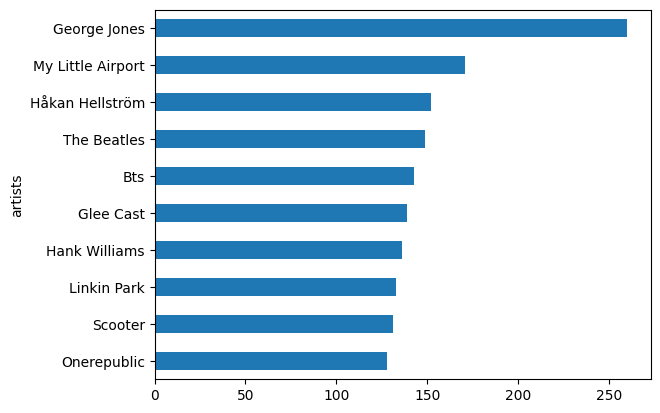

In [41]:
# top 10 artists with the largest collection of songs in data

(
    final_df['artists']
    .str.title()
    .value_counts()
    .nlargest(10)
    .sort_values()
    .plot(kind='barh')
)


## Album Name

In [42]:
final_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'no_of_genres'],
      dtype='object')

In [43]:
# unique albums in data

(
    final_df['album_name']
    .nunique()
)

46589

## Track Names

In [44]:
# unique tracks in data

(
    final_df['track_name']
    .nunique()
)

73608

In [45]:
# tracks that are duplicated

(
    final_df.loc[
        final_df
        .duplicated(keep=False,subset=['track_name']),:]
    .sort_values("track_name")
)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,no_of_genres
110868,1Ffxfl1vuEDc0xBVPIQ50s,Kid Koala,"""Was He Slow?"" (Music From The Motion Picture ...","""Was He Slow?"" - Music From The Motion Picture...",37,106880,False,0.754,0.7190,10,...,0,0.3710,0.3730,0.259,0.1200,0.674,175.990,4,[trip-hop],1
110954,03XMXPAE2Yx6HeqCpAPL5o,Kid Koala,Baby Driver (Music from the Motion Picture),"""Was He Slow?"" - Music From The Motion Picture...",25,106880,False,0.754,0.7190,10,...,0,0.3710,0.3730,0.259,0.1200,0.674,175.990,4,[trip-hop],1
79612,1wl5b2lw3YagQtZiYZbQWP,Thelonious Monk,"Genius Of Modern Music (Vol.1, Expanded Edition)",'Round Midnight,54,193840,False,0.542,0.3200,8,...,1,0.0387,0.9070,0.649,0.0609,0.206,116.648,4,[piano],1
45687,1qUdmikV7AoqFaOBPQg3ck,Baden Powell,Three Originals: Tristeza on Guitar / Poema on...,'Round Midnight,22,332613,False,0.392,0.0859,3,...,0,0.0436,0.9660,0.870,0.1040,0.134,93.584,4,[guitar],1
18997,7CzUkV2dSe5WwM4apgSIhK,Cody Johnson,New Country Hits,'Til You Can't,0,224213,False,0.501,0.8150,1,...,1,0.0436,0.0513,0.000,0.1060,0.460,160.087,4,[country],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61496,2NUEMsI2aRBmkCr9samAoP,Keyakizaka46,風に吹かれても,風に吹かれても,19,221506,False,0.706,0.9160,4,...,0,0.1150,0.2910,0.000,0.3280,0.886,125.927,4,[j-idol],1
60922,5mUl6GfKv2cGnnF7KsZTup,Seiko Matsuda,風立ちぬ,風立ちぬ(SEIKO STORY〜80's HITS COLLECTION〜),28,278400,False,0.580,0.7250,10,...,1,0.0289,0.4790,0.000,0.3860,0.629,131.332,4,"[j-idol, techno]",2
60814,5xPqG3KrBkIGarQQCDKfxC,Seiko Matsuda,風立ちぬ,風立ちぬ(SEIKO STORY〜80's HITS COLLECTION〜),31,275746,False,0.588,0.7100,10,...,1,0.0291,0.4120,0.000,0.3790,0.646,131.537,4,"[j-idol, techno]",2
62288,1LwSnnsoKcAUv9TPFEZ7iQ,yama,麻痺,麻痺,56,198100,False,0.532,0.9320,5,...,0,0.0522,0.0661,0.000,0.3800,0.738,100.100,4,[j-pop],1


In [46]:
# change track_name to title_case

final_df = (
                final_df.assign(
                    track_name = final_df['track_name'].str.title()
                )
            )

In [47]:
['track_name'] + final_df.columns[5:-2].to_list() 

['track_name',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [48]:
# drop the duplicates

final_df.duplicated(subset=['track_name'] + final_df.columns[5:-2].to_list()).sum()

6628

In [49]:
# drop the duplicates

final_df.drop_duplicates(subset=['track_name'] + final_df.columns[5:-2].to_list())

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,no_of_genres
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,"[acoustic, j-pop, singer-songwriter, songwriter]",4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,"[acoustic, chill]",2
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,[acoustic],1
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can'T Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,[acoustic],1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,[acoustic],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113544,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,[world-music],1
113545,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,[world-music],1
113546,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,[world-music],1
113547,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,[world-music],1


# Data Cleaning

In [50]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [51]:
def data_cleaning(data):
    return (
        data
        .drop(columns=data.columns[0])           # drop the unnamed column
        .dropna()                                # drop one row that contains missing values
        .drop_duplicates()                       # drop the duplicate rows from data
        .drop(columns=['track_genre'])           # drop the target column
        .merge(merged_genres_df,
               on='track_id',how="inner")        # merge dataframe with all genres column
        .assign(
            number_of_genres = lambda df_: df_['track_genre'].apply(lambda x: len(x))      
        )                                        # add number of ggenres detail in data
        .drop_duplicates(subset=data.columns[1:-1])
        .assign(**{
            col: lambda df_ : df_.loc[:,col].str.title()
            for col in ['artists','album_name','track_name']
        })
        .drop_duplicates(subset=['track_name'] + data.columns[6:-1].tolist())
    )

In [52]:
data_cleaning(df)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,number_of_genres
0,5SuOikwiRyPMVoIQDJUgSV,Comedy,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,"[acoustic, j-pop, singer-songwriter, songwriter]",4
1,4qPNDBW1i3p13qLCt0Ki3A,Ghost - Acoustic,Ghost - Acoustic,Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,"[acoustic, chill]",2
2,1iJBSr7s7jYXzM8EGcbK5b,To Begin Again,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,[acoustic],1
3,6lfxq3CG4xtTiEg7opyCyx,Can'T Help Falling In Love,Can'T Help Falling In Love,Can'T Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,[acoustic],1
4,5vjLSffimiIP26QG5WcN2K,Hold On,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,[acoustic],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113544,2C3TZjDRiAzdyViavDJ217,Sleep My Little Boy,Sleep My Little Boy,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,[world-music],1
113545,1hIz5L4IB9hN3WRYPOCGPw,Water Into Light,Water Into Light,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,[world-music],1
113546,6x8ZfSoqDjuNa5SVP5QjvX,Miss Perfumado,Miss Perfumado,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,[world-music],1
113547,2e6sXL2bYv4bSz6VTdnfLs,Friends,Friends,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,[world-music],1
